In [2]:
import pandas as pd
import re
import string
import collections
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import pickle

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('./train.csv', header=None, names=['polarity', 'title', 'text'])
df_test = pd.read_csv('./test.csv', header=None, names=['polarity', 'title', 'text'])

In [4]:
df.head()

,polarity,title,text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [5]:
df_test.head()

,polarity,title,text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   polarity  int64 
 1   title     object
 2   text      object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


c:\Users\simon\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


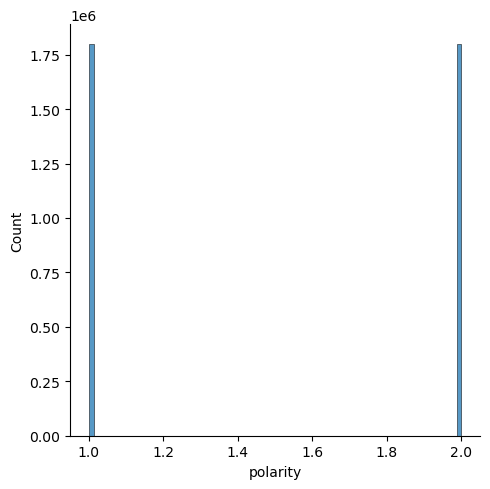

In [7]:
sns.displot(df, x='polarity')

In [8]:
df = df.dropna()
df_test = df_test.dropna()


In [9]:
X_train = df[['text', 'title']]
y_train = df['polarity']

X_test = df_test[['text', 'title']]
y_test = df_test['polarity']

In [10]:
X_train

,text,title
0,This sound track was beautiful! It paints the ...,Stuning even for the non-gamer
1,I'm reading a lot of reviews saying that this ...,The best soundtrack ever to anything.
2,This soundtrack is my favorite music of all ti...,Amazing!
3,I truly like this soundtrack and I enjoy video...,Excellent Soundtrack
4,"If you've played the game, you know how divine...","Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
3599995,The high chair looks great when it first comes...,Don't do it!!
3599996,I have used this highchair for 2 kids now and ...,"Looks nice, low functionality"
3599997,"We have a small house, and really wanted two o...","compact, but hard to clean"
3599998,not sure what this book is supposed to be. It ...,what is it saying?


In [11]:

def removeStopwordsAndLower(text):
    stop_words = set(stopwords.words('english')) 
    words = text.lower().split() 
    filtered_words = [word for word in words if word not in stop_words] 
    return ' '.join(filtered_words)
def lemaAndStem(text):
    stemmer = SnowballStemmer("english")
    wnl = WordNetLemmatizer()
    normalized_text = []
    for word in text.split():
        stemmed_word = stemmer.stem(word)
        stemmed_word = wnl.lemmatize(stemmed_word)
        normalized_text.append(stemmed_word)
    return ' '.join(normalized_text).replace(',', '')

X_train['text'] = X_train['text'].apply(removeStopwordsAndLower)
X_train['text'] = X_train['text'].apply(lemaAndStem)
X_train['title'] = X_train['title'].apply(removeStopwordsAndLower)
X_train['title'] = X_train['title'].apply(lemaAndStem)

X_test['text'] = X_test['text'].apply(removeStopwordsAndLower)
X_test['text'] = X_test['text'].apply(lemaAndStem)
X_test['title'] = X_test['title'].apply(removeStopwordsAndLower)
X_test['title'] = X_test['title'].apply(lemaAndStem)

C:\Users\simon\AppData\Local\Temp\ipykernel_27072\4288029987.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'] = X_train['text'].apply(removeStopwordsAndLower)
C:\Users\simon\AppData\Local\Temp\ipykernel_27072\4288029987.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'] = X_train['text'].apply(lemaAndStem)
C:\Users\simon\AppData\Local\Temp\ipykernel_27072\4288029987.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Text(0, 0.5, 'Frecuencia')

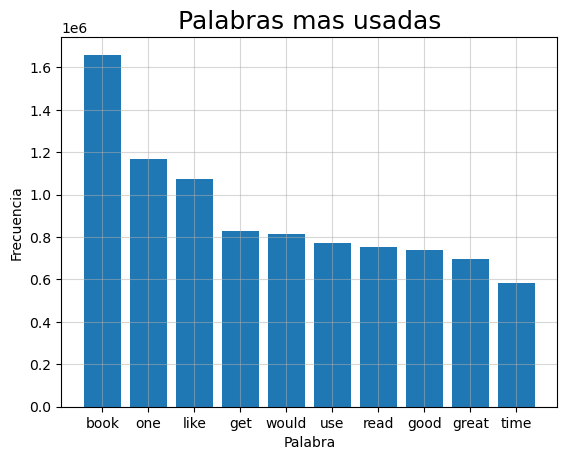

In [12]:
words = []
for text in X_train['text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(10))


plt.bar(range(len(top_words)), list(top_words.values()), align = 'center')

plt.xticks(range(len(top_words)), list(top_words.keys()))

plt.grid(alpha = 0.5)

plt.title('Palabras mas usadas', fontsize = 18)
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')

In [13]:
count_vect = CountVectorizer()
vcModel = count_vect.fit(X_train['text'])

X_train_counts = vcModel.transform(X_train['text'])
X_test_counts = vcModel.transform(X_test['text'])

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)

X_train = tf_transformer.transform(X_train_counts)
X_test = tf_transformer.transform(X_test_counts)

In [14]:
pickle.dump(vcModel, open('transformModel_vcModel.pkl', 'wb'))
pickle.dump(tf_transformer, open('transformModel_tf_transformer.pkl', 'wb'))

In [15]:
y_train.replace([1, 2],
                        [0, 1], inplace=True)

y_test.replace([1, 2],
                        [0, 1], inplace=True)

In [16]:
parameters = {
    'learning_rate':[1, 0.5, 0.1, 0.05], 
    'n_estimators': [150, 200, 250],
    'max_depth': [3, 6, 8, 10]
}
brt = XGBClassifier()
clf = RandomizedSearchCV(estimator=brt, param_distributions=parameters, cv= 2)
clf.fit(X_train, y_train)

c:\Users\simon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\simon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\simon\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\simon\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py", line 1515, in fit
    self._Booster = train(
              

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [1, 0.5, 0.1, 0.05],
                                        'max_depth': [3, 6, 8, 10],
                                        'n_estimators': [150, 200, 250]})

In [17]:
clf.best_params_

{'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.5}

In [23]:
model = XGBClassifier(learning_rate=1, n_estimators=200,max_depth= 3)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
model.score(X_test, y_test)

0.8455532331939917

In [25]:
modelResult1 = ['XGBoost: ']

predictions = model.predict(X_test)

modelResult1.append(f1_score(y_test, predictions, average='weighted'))

modelResult1.append(recall_score(y_test, predictions, average='macro'))

modelResult1.append(precision_score(y_test, predictions, average='macro'))

pd.DataFrame([modelResult1], columns=['Model', 'F1 score', 'Recall score', 'Precision_score']) 

,Model,F1 score,Recall score,Precision_score
0,XGBoost:,0.845544,0.845553,0.84564


[Text(0.5, 0, 'Predecido'),
 Text(0, 0.5, 'Verdadero'),
 Text(0.5, 1.0, 'Matriz de confision modelo Random Forest')]

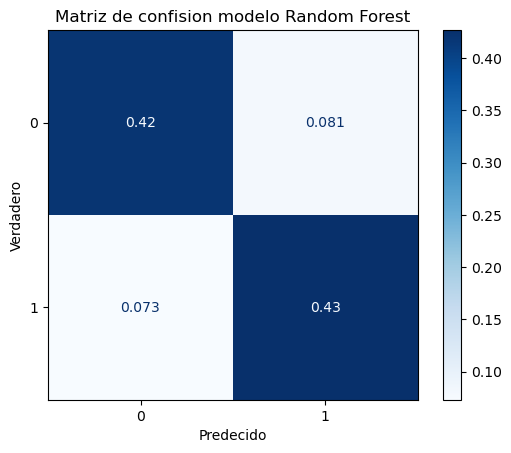

In [26]:
cm = confusion_matrix(y_test, predictions, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
cmd.plot(cmap=plt.cm.Blues)
cmd.ax_.set(xlabel='Predecido', ylabel='Verdadero', title='Matriz de confision modelo Random Forest')

In [27]:
modelFileSave = 'trained_model_XGBoost.pkl'
pickle.dump(model, open(modelFileSave, 'wb'))